In [1]:
#<--------------------------MicroGrad Intro -------------------------------------------------------->
from micrograd.engine import Value
a = Value(-4.0)
b = Value(2.0)
c = a + b
d = a *b + b**3
c += c + 1
c += 1 + c + (-a)
d += d*2 + (b+a).relu()
d += 3 * d + (b-a).relu()
e = c-d 
f = e**2
g = f/2.0
g += 10.0/f
print(f'{g.data:.4f}') # outcome of first forward pass
g.backward()
print(f'{a.grad:.4f}') # Prints numerical value of dg/da
print(f'{b.grad:.4f}') # prints numerical value of dg/db
#<------------------------------------------------------------>

24.7041
138.8338
645.5773


In [2]:
import numpy as np,math,matplotlib.pyplot as plt

def f(x):
    return 3*x**2-4*x +5

print(f(3.0))

20.0


In [3]:

xs = np.arange(-5,5,0.25)
ys = f(xs)
xs,ys



(array([-5.  , -4.75, -4.5 , -4.25, -4.  , -3.75, -3.5 , -3.25, -3.  ,
        -2.75, -2.5 , -2.25, -2.  , -1.75, -1.5 , -1.25, -1.  , -0.75,
        -0.5 , -0.25,  0.  ,  0.25,  0.5 ,  0.75,  1.  ,  1.25,  1.5 ,
         1.75,  2.  ,  2.25,  2.5 ,  2.75,  3.  ,  3.25,  3.5 ,  3.75,
         4.  ,  4.25,  4.5 ,  4.75]),
 array([100.    ,  91.6875,  83.75  ,  76.1875,  69.    ,  62.1875,
         55.75  ,  49.6875,  44.    ,  38.6875,  33.75  ,  29.1875,
         25.    ,  21.1875,  17.75  ,  14.6875,  12.    ,   9.6875,
          7.75  ,   6.1875,   5.    ,   4.1875,   3.75  ,   3.6875,
          4.    ,   4.6875,   5.75  ,   7.1875,   9.    ,  11.1875,
         13.75  ,  16.6875,  20.    ,  23.6875,  27.75  ,  32.1875,
         37.    ,  42.1875,  47.75  ,  53.6875]))

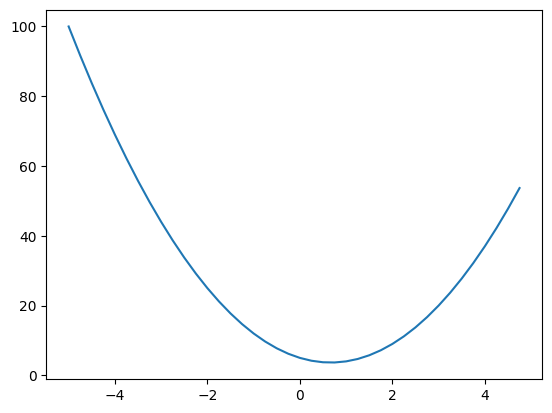

In [4]:
plt.plot(xs,ys)

In [5]:
h = 0.001 #run
x = 3.0
y = x+h
(f(y)-f(x))/h # rise/run

14.00300000000243

In [6]:
h = 0.001 #run
x = -3.0
y = x+h
(f(y)-f(x))/h # rise/run

-21.996999999998934

In [7]:
a =2.0
b = -3.0
c = 10.0
d = a*b + c
print(d)
# derivate of d w.r.t. a,b,c

h = 0.0001
d1 =a*b + c
a+=h
d2 = a*b+c
# slope = (d2-d1)/h
d1,d2,(d2-d1)/h


4.0


(4.0, 3.999699999999999, -3.000000000010772)

In [8]:
a =2.0
b = -3.0
c = 10.0
d = a*b + c
h = 0.0001
d1 =a*b + c
b+=h
d2 = a*b+c
# slope = (d2-d1)/h
d1,d2,(d2-d1)/h

(4.0, 4.0002, 2.0000000000042206)

In [9]:
a =2.0
b = -3.0
c = 10.0
d = a*b + c
h = 0.0001
d1 =a*b + c
c+=h
d2 = a*b+c
# slope = (d2-d1)/h
d1,d2,(d2-d1)/h

(4.0, 4.0001, 0.9999999999976694)

# Intro to  Neural Networks starts 

In [10]:
class Value:
    def __init__(self,data):
        self.data = data
    def __repr__(self):
        return f"Value(data={self.data})"
    def __add__(self,other):
        out = Value(self.data+other.data)
        return out
    def __mul__(self,other):
        out = Value(self.data*other.data)
        return out
a = Value(2.0)
b = Value(-3.0)
c = Value(10.0)
a+b,a*b,a*b+c

(Value(data=-1.0), Value(data=-6.0), Value(data=4.0))

We want to know what values produce other values so we add children tuple to our Class

In [11]:
class Value:
    def __init__(self,data,_children=(),_op='',label=''):
        self.data = data
        self.grad = 0.0 # means no effect, ie at initialisation every value does not effect the output
        self._prev = set(_children)
        self._op = _op
        self.label = label
    def __repr__(self):
        return f"Value(data={self.data})"
    def __add__(self,other):
        out = Value(self.data+other.data,(self,other),'+')
        return out
    def __mul__(self,other):
        out = Value(self.data*other.data,(self,other),'*')
        return out
a = Value(2.0,label='a')
b = Value(-3.0,label='b')
c = Value(10.0,label='c')
e = a*b;e.label='e'
d= e+c;d.label='d'
f = Value(-2.0,label='f')
L = d*f;L.label='L'


To Visualise this we create some code

In [12]:
from graphviz import Digraph
def trace(root):
    # builds a set of all nodes and edges in a graph
    nodes,edges = set(),set()
    def build(v):
        if v not in nodes:
            nodes.add(v)
            for child in v._prev:
                edges.add((child,v))
                build(child)
    build(root)
    return nodes,edges

def draw_dot(root):
    dot = Digraph(format='svg',graph_attr={'rankdir':'LR'}) # LR = Left to right
    nodes,edges = trace(root)
    
    for n in nodes: 
        uid = str(id(n))
        # for any value in the graph, create a rectangular ('record') node for it
        dot.node(name=uid,label="{%s | data %.4f | grad %.4f}" % (n.label,n.data,n.grad),shape='record')
        if n._op:
            #if this value is the result of some operation, create an op node for it
            dot.node(name=uid+n._op,label=n._op)
            # and connect this node to it
            dot.edge(uid+n._op,uid)
    for n1,n2 in edges:
        # connect n1 to the op node of n2
        dot.edge(str(id(n1)),str(id(n2))+n2._op)
    return dot


Make sure to install graphviz on system as well as on python

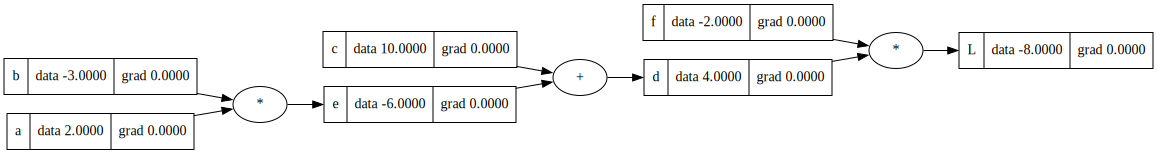

In [13]:
draw_dot(L)

This is visualising the forward pass.
Now we would like to create a backpropogation, and calculate gradients of d,f,c,e w.r.t L 
essentially meaning the impact these have on L.
For this we create a new variable in our class Value called grad.

In [14]:
def lol():
    h = 0.0001
    a = Value(2.0,label='a')
    b = Value(-3.0,label='b')
    c = Value(10.0,label='c')
    e = a*b;e.label='e'
    d= e+c;d.label='d'
    f = Value(-2.0,label='f')
    L = d*f;L.label='L'
    L1 = L.data
    
    a = Value(2.0 ,label='a')
    b = Value(-3.0,label='b')
    c = Value(10.0,label='c')
    e = a*b;e.label='e'
    d= e+c;d.label='d'
    f = Value(-2.0,label='f')
    L = d*f;L.label='L'
    L2 = L.data
    print((L2-L1)/h)
lol()

0.0


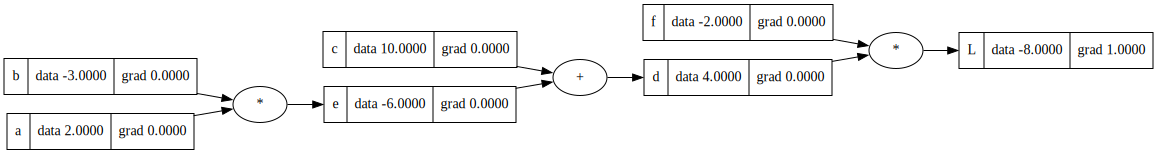

In [15]:
L.grad=1 # using lol function manually
draw_dot(L)

L = d*f
dL/dd = f

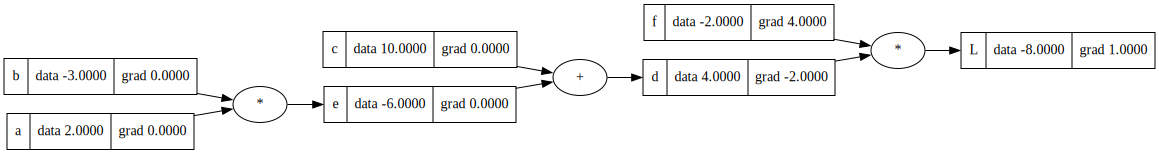

In [16]:
d.grad = f.data
f.grad = d.data
draw_dot(L)

by calculating dL/dd we know how d impacts L, to calculate dL/dc we want to know how c impacts L through d.
therefore , what is dd/dc?{local gradient} 
d = c + e
dd/dc = 1.0
(f(x+h) - f(x))/h
((c+h+e) - (c +e))/h
(c + h + e - c - e)/h
h/h = 1.0
Also by symmetry dd/de = 1.0
to calculate dL/dc we use chain rule{dz/dx = (dz/dy)*(dy/dx)}, where a variable z depends upon a variable y which itself depends upon a variable x.
dL/dc = dL/dd * dd/dc
So dL/dc = -2.0

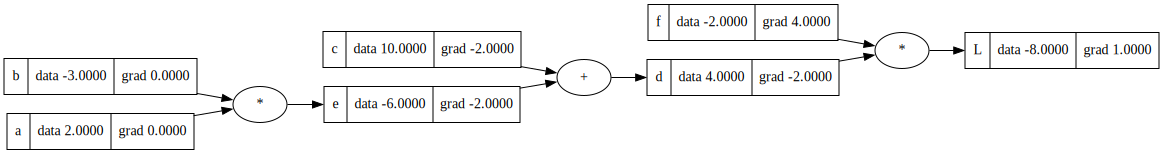

In [17]:
c.grad = -2.0
e.grad = -2.0
draw_dot(L)

dL/da = dL/de * de/da = 6.00
dL/db = -2 * 2 = 4
de/da = b = -3
de/db = a = 2


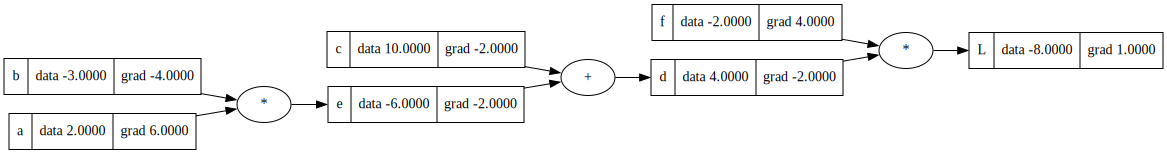

In [18]:
a.grad=6.0
b.grad = -4.0
draw_dot(L)

Backpropogation is just recursive application of Chain Rule

Now we our going to nudge our inputs to try to make L go up

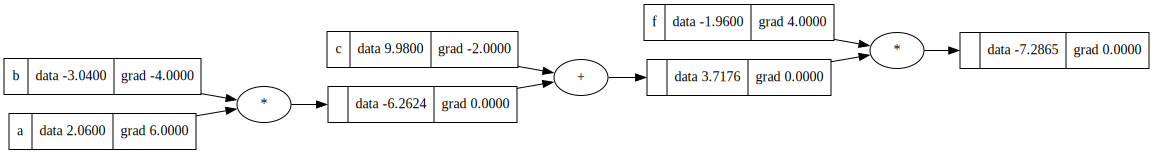

In [19]:
a.data += 0.01 * a.grad
b.data += 0.01 * b.grad
c.data += 0.01 * c.grad

f.data += 0.01 * f.grad
# Implementing the forward pass again
e = a*b
d= e+c
L = d*f
draw_dot(L)

## Backpropogation Through a Neuron below:


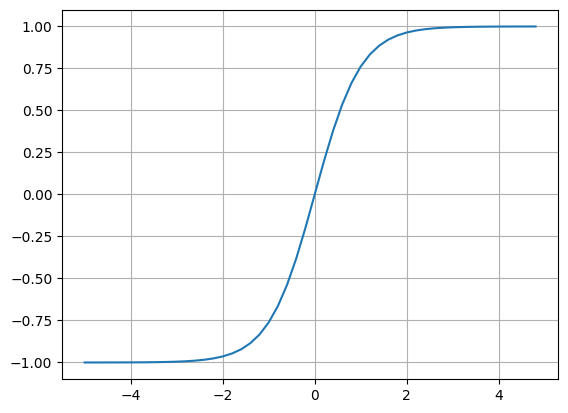

In [20]:
plt.plot(np.arange(-5,5,0.2),np.tanh(np.arange(-5,5,0.2)));plt.grid();

Redefine our Value class to add exponentiation to implement tanh activation function

In [21]:
class Value:
    def __init__(self,data,_children=(),_op='',label=''):
        self.data = data
        self.grad = 0.0 # means no effect, ie at initialisation every value does not effect the output
        self._prev = set(_children)
        self._op = _op
        self.label = label
    def __repr__(self):
        return f"Value(data={self.data})"
    def __add__(self,other):
        out = Value(self.data+other.data,(self,other),'+')
        return out
    def __mul__(self,other):
        out = Value(self.data*other.data,(self,other),'*')
        return out
    #Implementing tanh function
    def tanh(self):
        n = self.data
        t=(math.exp(2*n)-1)/(math.exp(2*n)+1)#tanh function 
        out = Value(t,(self,),'tanh')
        return out
        

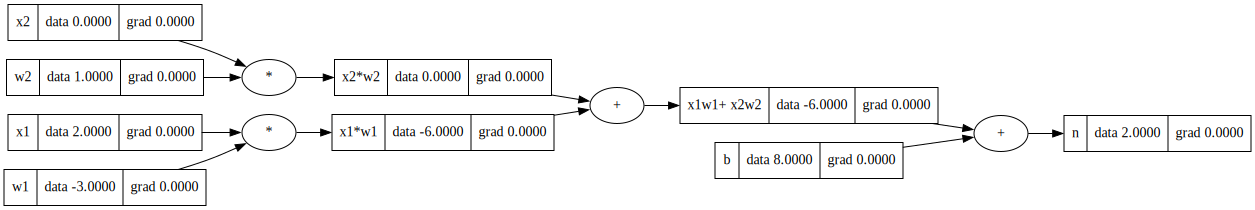

In [22]:
#inputs - x1,x2
x1=Value(2.0,label='x1')
x2=Value(0.0,label='x2')
# weights- w1,w2
w1=Value(-3.0,label='w1')
w2=Value(1.0,label='w2')
#bias of neuron
b=Value(8,label='b')
# x1w1 + x2w2 + b
x1w1 = x1*w1;x1w1.label='x1*w1'
x2w2 = x2*w2;x2w2.label='x2*w2'
x1w1x2w2 = x1w1 + x2w2; x1w1x2w2.label='x1w1+ x2w2'
n = x1w1x2w2 + b; n.label='n'
draw_dot(n)


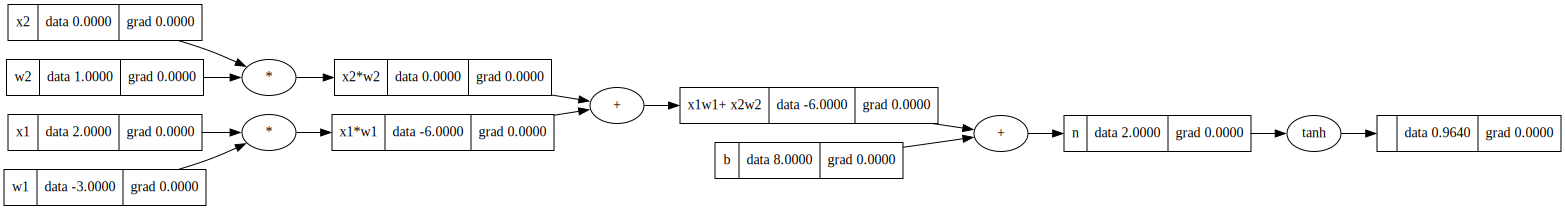

In [23]:
o = n.tanh()
draw_dot(o)

tanh squashed the input to 1

## Backpropogatiion

In [24]:
#inputs - x1,x2
x1=Value(2.0,label='x1')
x2=Value(0.0,label='x2')
# weights- w1,w2
w1=Value(-3.0,label='w1')
w2=Value(1.0,label='w2')
#bias of neuron
b=Value(6.8813735870195432,label='b')# this specific number so when doing backprop numbers come out nice
# x1w1 + x2w2 + b
x1w1 = x1*w1;x1w1.label='x1*w1'
x2w2 = x2*w2;x2w2.label='x2*w2'
x1w1x2w2 = x1w1 + x2w2; x1w1x2w2.label='x1w1+ x2w2'
n = x1w1x2w2 + b; n.label='n'
o = n.tanh();o.label='o'


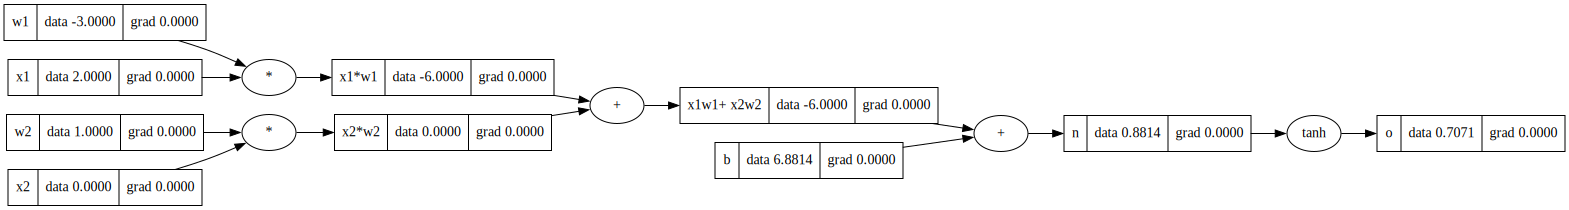

In [25]:
draw_dot(o)

In [26]:
o.grad=1.0

In [27]:
# o = tanh(n)
#do/dn = 1-(tanh(n))^2 == 1- o**2
n.grad = 1.0 - ((o.data)**2) # ~0.5

In [28]:
x1w1x2w2.grad=0.5
b.grad = 0.5 # as '+' sign distributes the gradient equally
x1w1.grad = 0.5
x2w2.grad = 0.5

In [29]:
x2.grad = w2.data*x2w2.grad
w2.grad = x2.data*x2w2.grad # is zero as x2 = 0 so w2 has no influence i.e gradient == 0 as tweaking w does not change anything
x1.grad = w1.data*x1w1.grad
w1.grad = x1.data*x1w1.grad

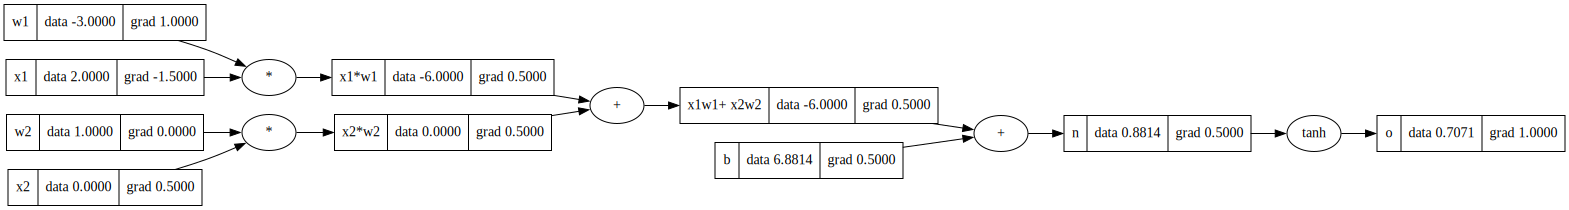

In [30]:
draw_dot(o)

As w1 = 1.0 , Increasing it will increase the output of the neuron{w2.grad = 0}

## Automatic Backpropogation

In [31]:
class Value:
    def __init__(self,data,_children=(),_op='',label=''):
        self.data = data
        self.grad = 0.0 # means no effect, ie at initialisation every value does not effect the output
        self._backward= lambda:None # empty function
        self._prev = set(_children)
        self._op = _op
        self.label = label
    def __repr__(self):
        return f"Value(data={self.data})"
    def __add__(self,other):
        out = Value(self.data+other.data,(self,other),'+')
        def _backward():
            self.grad = 1.0 * out.grad
            other.grad = 1.0 * out.grad
        out._backward = _backward # linking the out to this specific ._backward Function
        return out
    def __mul__(self,other):
        out = Value(self.data*other.data,(self,other),'*')
        def _backward():
            self.grad = (other.data) * out.grad
            other.grad = (self.data)* out.grad
        out._backward = _backward # linking the out to this specific ._backward Function
        return out
    #Implementing tanh function
    def tanh(self):
        n = self.data
        t=(math.exp(2*n)-1)/(math.exp(2*n)+1)#tanh function 
        out = Value(t,(self,),'tanh')
        def _backward():
             self.grad = (1-(t**2))* out.grad
            
        out._backward = _backward # linking the out to this specific ._backward Function
        return out
    
#inputs - x1,x2
x1=Value(2.0,label='x1')
x2=Value(0.0,label='x2')
# weights- w1,w2
w1=Value(-3.0,label='w1')
w2=Value(1.0,label='w2')
#bias of neuron
b=Value(6.8813735870195432,label='b')# this specific number so when doing backprop numbers come out nice
# x1w1 + x2w2 + b
x1w1 = x1*w1;x1w1.label='x1*w1'
x2w2 = x2*w2;x2w2.label='x2*w2'
x1w1x2w2 = x1w1 + x2w2; x1w1x2w2.label='x1w1+ x2w2'
n = x1w1x2w2 + b; n.label='n'
o = n.tanh();o.label='o'
        

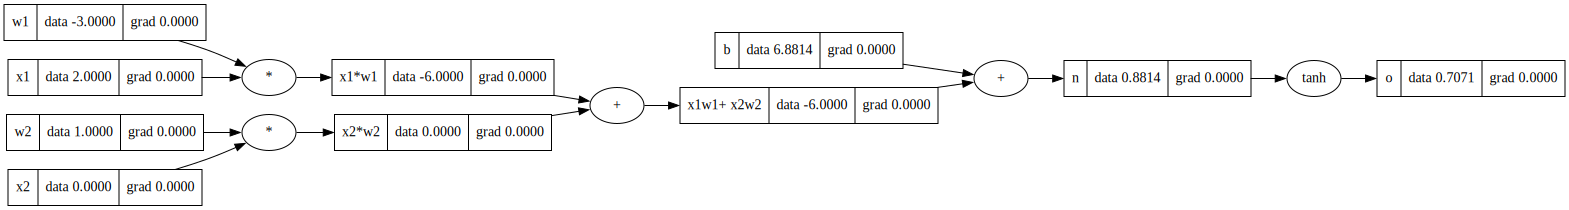

In [32]:
draw_dot(o)

In [33]:
o.grad = 1.0
o._backward()

In [34]:
n._backward()
b._backward()

In [35]:
x1w1x2w2._backward()

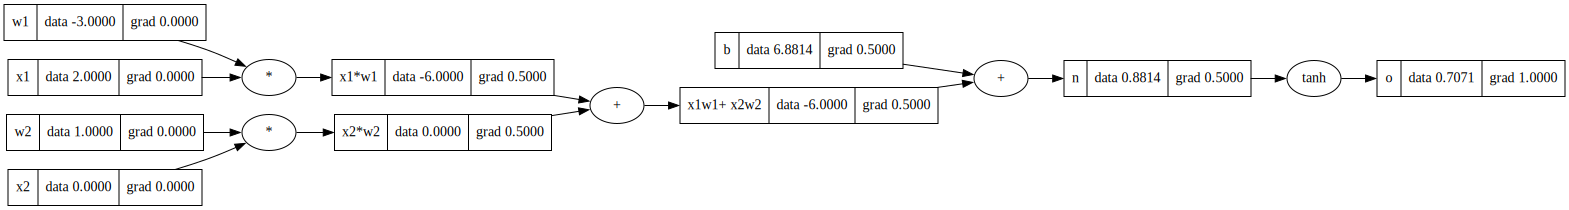

In [36]:
draw_dot(o)

In [37]:
o.grad = 1.0
o._backward()
x1w1._backward()
x2w2._backward()
x1w1x2w2._backward()
n._backward()
b._backward()

### Automating this:
Use a technique called Topological Sort to get the ordering of graphs to process all edges from left to right.


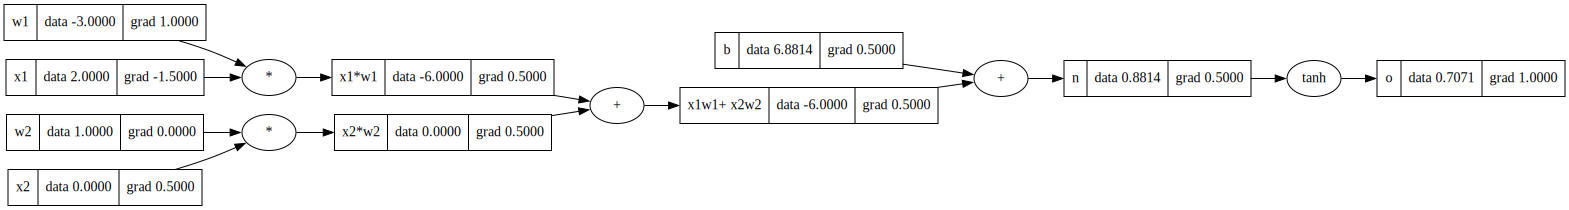

In [38]:
topo = []
visited = set()
def build_topo(v):
    if v not in visited:
        visited.add(v)
        for child in v._prev:
            build_topo(child)
        topo.append(v) # o is added last , so it gurrantees all child nodes are processed before
build_topo(o) # root node
for node in reversed(topo):
    node._backward()
draw_dot(o)

In [39]:
class Value:
    def __init__(self,data,_children=(),_op='',label=''):
        self.data = data
        self.grad = 0.0 # means no effect, ie at initialisation every value does not effect the output
        self._backward= lambda:None # empty function
        self._prev = set(_children)
        self._op = _op
        self.label = label
    def __repr__(self):
        return f"Value(data={self.data})"
    def __add__(self,other):
        out = Value(self.data+other.data,(self,other),'+')
        def _backward():
            self.grad += 1.0 * out.grad
            other.grad += 1.0 * out.grad
        out._backward = _backward # linking the out to this specific ._backward Function
        return out
    def __mul__(self,other):
        out = Value(self.data*other.data,(self,other),'*')
        def _backward():
            self.grad += (other.data) * out.grad
            other.grad += (self.data)* out.grad
        out._backward = _backward # linking the out to this specific ._backward Function
        return out
    #Implementing tanh function
    def tanh(self):
        n = self.data
        t=(math.exp(2*n)-1)/(math.exp(2*n)+1)#tanh function 
        out = Value(t,(self,),'tanh')
        def _backward():
             self.grad += (1-(t**2))* out.grad
            
        out._backward = _backward # linking the out to this specific ._backward Function
        return out
    def backward(self):
        
        topo = []
        visited = set()
        def build_topo(v):
            if v not in visited:
                visited.add(v)
                for child in v._prev:
                    build_topo(child)
                topo.append(v) # o is added last , so it gurrantees all child nodes are processed before
        build_topo(self) # root node
        self.grad=1.0
        for node in reversed(topo):
            node._backward()
#inputs - x1,x2
x1=Value(2.0,label='x1')
x2=Value(0.0,label='x2')
# weights- w1,w2
w1=Value(-3.0,label='w1')
w2=Value(1.0,label='w2')
#bias of neuron
b=Value(6.8813735870195432,label='b')# this specific number so when doing backprop numbers come out nice
# x1w1 + x2w2 + b
x1w1 = x1*w1;x1w1.label='x1*w1'
x2w2 = x2*w2;x2w2.label='x2*w2'
x1w1x2w2 = x1w1 + x2w2; x1w1x2w2.label='x1w1+ x2w2'
n = x1w1x2w2 + b; n.label='n'
o = n.tanh();o.label='o'

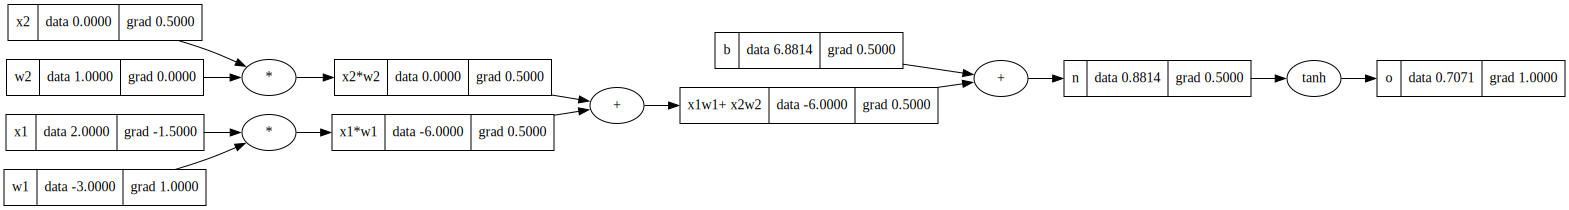

In [40]:
o.backward()
draw_dot(o)

#### Fixing a bug when a node is used multiple times, say b = a+ a,, or d = a+b and e = a* b. Overwriting of Gradients happen, when there should be accumulation of gradients. So we can repalce  = by += in _backward function in Class Value.

# 1:27:05

In [41]:
class Value:
    def __init__(self,data,_children=(),_op='',label=''):
        self.data = data
        self.grad = 0.0 # means no effect, ie at initialisation every value does not effect the output
        self._backward= lambda:None # empty function
        self._prev = set(_children)
        self._op = _op
        self.label = label
    def __repr__(self):
        return f"Value(data={self.data})"
    def __add__(self,other):
        other = other if isinstance(other,Value) else Value(other)
        out = Value(self.data+other.data,(self,other),'+')
        def _backward():
            self.grad += 1.0 * out.grad
            other.grad += 1.0 * out.grad
        out._backward = _backward # linking the out to this specific ._backward Function
        return out
    def __radd__(self, other):
        return self + other
    def __mul__(self,other):
        other = other if isinstance(other,Value) else Value(other)
        out = Value(self.data*other.data,(self,other),'*')
        def _backward():
            self.grad += (other.data) * out.grad
            other.grad += (self.data)* out.grad
        out._backward = _backward # linking the out to this specific ._backward Function
        return out
    #Implementing tanh function
    def __rmul__(self,other):
        return self * other
    
    def exp(self):
        x = self.data
        out = Value(math.exp(x),(self,),'exp')
        def _backward():
            self.grad += out.data * out.grad
        out._backward = _backward
        return out
    def __pow__(self,other):
        assert isinstance(other,(int,float)), "only supports int/float for now"
        out = Value(self.data**other,(self,),f'**{other}')
        def _backward():
            self.grad += (other * (self.data**(other-1))) * out.grad
        out._backward = _backward
        return out
    
    
    def __truediv__(self,other):
        return self * other ** -1
    
    def __neg__(self):
        return self * -1
    
    def __sub__(self,other):
        
        return self + (-other)
    
    def tanh(self):
        n = self.data
        t=(math.exp(2*n)-1)/(math.exp(2*n)+1)#tanh function 
        out = Value(t,(self,),'tanh')
        def _backward():
             self.grad += (1-(t**2))* out.grad
            
        out._backward = _backward # linking the out to this specific ._backward Function
        return out
    def backward(self):
        
        topo = []
        visited = set()
        def build_topo(v):
            if v not in visited:
                visited.add(v)
                for child in v._prev:
                    build_topo(child)
                topo.append(v) # o is added last , so it gurrantees all child nodes are processed before
        build_topo(self) # root node
        self.grad=1.0
        for node in reversed(topo):
            node._backward()

we define __rmul__ method so as to make 2 * x work and Python will look for right multiplication function when it cannot find one for the left one.
a + 2 works , but 2 + a does not work
#### Division :
a/b >> a * (1/b) >> a * (b **-1)

In [42]:
#inputs - x1,x2
x1=Value(2.0,label='x1')
x2=Value(0.0,label='x2')
# weights- w1,w2
w1=Value(-3.0,label='w1')
w2=Value(1.0,label='w2')
#bias of neuron
b=Value(6.8813735870195432,label='b')# this specific number so when doing backprop numbers come out nice
# x1w1 + x2w2 + b
x1w1 = x1*w1;x1w1.label='x1*w1'
x2w2 = x2*w2;x2w2.label='x2*w2'
x1w1x2w2 = x1w1 + x2w2; x1w1x2w2.label='x1w1+ x2w2'
n = x1w1x2w2 + b; n.label='n'
#------------

e = (2*n).exp()
o = (e-1)/(e+1);o.label='o'



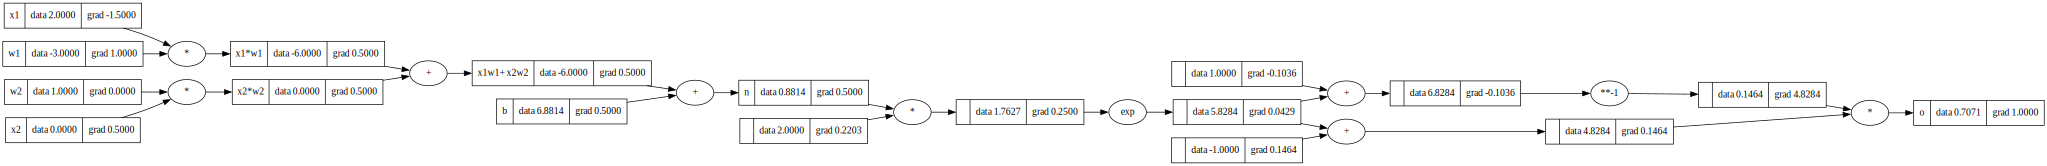

In [43]:
o.backward()
draw_dot(o)

# Using PyTorch Api

In [44]:
import torch
torch.cuda.is_available()
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
print(device)

d:\work\work\lib\site-packages\tqdm\auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


cuda:0


In [45]:
torch.cuda.get_device_name(0)

'NVIDIA GeForce RTX 3070 Ti Laptop GPU'

In [46]:

x1 = torch.Tensor([2.0]).double().cpu()               ;   x1.requires_grad = True
x2 = torch.Tensor([0.0]).double().cpu()              ;   x2.requires_grad = True
w1 = torch.Tensor([-3.0]).double().cpu()              ;   w1.requires_grad = True
w2 = torch.Tensor([1.0]).double().cpu()                ;   w2.requires_grad = True
b = torch.Tensor([6.8813735870195432]).double().cpu()  ;   b.requires_grad = True

n = x1*w1 + x2*w2 + b
o = torch.tanh(n)
print(o.data.item())
o.backward()

print('------')
print('x2',x2.grad.item())
print('w2',w2.grad.item())
print('x1',x1.grad.item())
print('w1',w1.grad.item())


0.7071066904050358
------
x2 0.5000001283844369
w2 0.0
x1 -1.5000003851533106
w1 1.0000002567688737


In [47]:

x1 = torch.Tensor([2.0]).double().cuda()               ;   x1.requires_grad = True
x2 = torch.Tensor([0.0]).double().cuda()               ;   x2.requires_grad = True
w1 = torch.Tensor([-3.0]).double().cuda()               ;   w1.requires_grad = True
w2 = torch.Tensor([1.0]).double().cuda()                ;   w2.requires_grad = True
b = torch.Tensor([6.8813735870195432]).double().cuda()  ;   b.requires_grad = True

n = x1*w1 + x2*w2 + b

o = torch.tanh(n).cuda()
print(o.data.item())
o.backward()

print('------')
print('x2',x2.grad.item())
print('w2',w2.grad.item())
print('x1',x1.grad.item())
print('w1',w1.grad.item())


0.7071066904050358
------
x2 0.5000001283844369
w2 0.0
x1 -1.5000003851533106
w1 1.0000002567688737


In [48]:
n.is_cuda

True

## Neural Net And Multi Layer Perceptron

In [49]:
import random
class Neuron:
    def __init__(self,nin):
        self.w = [Value(random.uniform(-1,1)) for _ in range(nin)]
        self.b = Value(random.uniform(-1,1))
    # __call__ == f(x)
    def __call__(self,x):
        act = sum(wi*xi for wi, xi in zip(self.w,x)) + self.b # Activation
        act = sum((wi*xi for wi,xi in zip(self.w,x)),self.b)
        out = act.tanh()
        return out
    def parameters(self):
        return self.w + [self.b]
class Layer:
    def __init__(self,nin,nout):
        self.neurons = [Neuron(nin) for _ in range(nout)]
        
    def __call__(self,x):
        outs = [n(x) for n in self.neurons]
        return outs[0] if len(outs) == 1 else outs
    
    def parameters(self):
        params = []
        for neuron in self.neurons:
            ps = neuron.parameters()
            params.extend(ps)
        return params
        
    
class MLP:
    def __init__(self,nin,nouts):
        sz = [nin] + nouts
        self.layers = [Layer(sz[i],sz[i+1]) for i in range(len(nouts))]
    def __call__(self,x):
        for layer in self.layers:
            x = layer(x)
        return x    
    
    def parameters(self):
        return [p for layer in self.layers for p in layer.parameters()]

        
    

In [50]:
x = [2.0,3.0,-1.0]
n = MLP(3,[4,4,1])
n(x)

Value(data=0.6361417222217429)

In [117]:
#draw_dot(n(x))

In [51]:
xs = [
    [2.0,3.0,-1.0],
     [3.0,-1.0,0.5],
     [0.5,1.0,1.0],
     [1.0,1.0,-1.0],
    ] # inputs
ys = [1.0,-1.0,-1.0,1.0] # targets

In [52]:
ypred = [n(x) for x in xs ]
ypred

[Value(data=0.6361417222217429),
 Value(data=0.06965504691145988),
 Value(data=0.4723280140496923),
 Value(data=0.41093247482226686)]

Loss measures how overall the neural net is performing

In [53]:
[(yout-ygt)**2 for ygt,yout in zip(ys,ypred)]

[Value(data=0.1323928463077593),
 Value(data=1.1441619193831574),
 Value(data=2.167749780955511),
 Value(data=0.3470005492190192)]

In [54]:
loss = sum([(yout-ygt)**2 for ygt,yout in zip(ys,ypred)])
loss

Value(data=3.7913050958654466)

In [56]:
loss.backward()

Value(data=3.7913050958654466)

In [57]:
n.parameters()

[Value(data=0.8978294214201044),
 Value(data=-0.5245412998028034),
 Value(data=-0.3960005606673569),
 Value(data=0.13422101552052368),
 Value(data=0.05172351657800078),
 Value(data=-0.6283971541343387),
 Value(data=0.4234954251230927),
 Value(data=-0.008108341039031686),
 Value(data=0.4296182767280361),
 Value(data=-0.6577419535459346),
 Value(data=-0.49420255095256405),
 Value(data=-0.4834032755159732),
 Value(data=0.8899647167750679),
 Value(data=-0.8781823886421685),
 Value(data=0.8778671043004267),
 Value(data=-0.46770890035180757),
 Value(data=0.03981370781431348),
 Value(data=-0.38908024126223983),
 Value(data=0.21868801523060033),
 Value(data=0.5986777152149718),
 Value(data=-0.3227039283463018),
 Value(data=-0.163673133496685),
 Value(data=0.20031790683170336),
 Value(data=0.2356291987180048),
 Value(data=-0.6922245829597846),
 Value(data=-0.7963174574828655),
 Value(data=0.8607554487054276),
 Value(data=-0.3443400879310161),
 Value(data=-0.6093689607053547),
 Value(data=-0.337

We want to minimise the loss so we flip the sign as the gradient of all parameters is a vector pointing towards loss, i.e negative sign

In [58]:
for p in n.parameters():
    p.data += -0.01 * p.grad

In [59]:
n.layers[0].neurons[0].w[0].data

0.8822984016702459

In [60]:
ypred = [n(x) for x in xs ]
loss = sum([(yout-ygt)**2 for ygt,yout in zip(ys,ypred)])
loss
# We expect the overall loss to decrease when doing the forward pass again.

Value(data=0.5844648374872088)

In [61]:
for p in n.parameters():
    p.grad = 0.0

loss.backward()
for p in n.parameters():
    p.data += -0.01 * p.grad
ypred = [n(x) for x in xs ]
loss = sum([(yout-ygt)**2 for ygt,yout in zip(ys,ypred)])

n.layers[0].neurons[0].w[0].data,loss

(0.8861456954226475, Value(data=0.5158961168482099))

In [62]:
ypred

[Value(data=0.628136397144621),
 Value(data=-0.8770651772237206),
 Value(data=-0.6523726583007227),
 Value(data=0.5084149734057337)]